In [2]:
import numpy, pandas, matplotlib, yfinance, scipy
print("Libraries imported successfully!")

Libraries imported successfully!


#Day 1: Numpy and sciPy Basics
Initial quant finance tasks: random matrix with NumPy, normal distribution fit with SciPy

Matrix Mean: 0.501486, Std Dev: 0.290163


Matplotlib is building the font cache; this may take a moment.


Fitted Mean: 0.027680, Fitted Std Dev: 0.992032


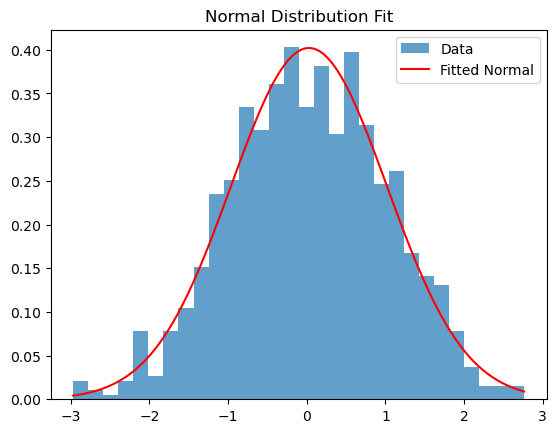

In [4]:
import numpy as np
matrix = np.random.rand(50, 50) # 50x50 matrix, valurs in [0,1)
mean = np.mean(matrix)
std_dev = np.std(matrix)
print(f"Matrix Mean: {mean:.6f}, Std Dev: {std_dev:6f}")

from scipy import stats
import matplotlib.pyplot as plt
data = stats.norm. rvs(loc=0, scale=1, size=1000) # 1000 samples, N(0,1)
mu, sigma = stats.norm.fit(data) # Fit normal distribution
print(f"Fitted Mean: {mu:.6f}, Fitted Std Dev: {sigma:.6f}")
plt.hist(data, bins=30, density =True, alpha=0.7, label="Data")
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("Normal Distribution Fit")
plt.legend()
plt.show()


# Random Variables Notes
- Random variable: Represents random process outcomes (e.g., coin toss result).
- Discrete: Countable values (e.g., 0 or 1).
- Continuous: Range of values (e.g., stock returns).
- Expected value: Probability-weighted average e.g., coin toss (0.5*0 + 0.5*1 = 0.5)

In [5]:
from scipy import stats
import numpy as np
coin_tosses = stats.bernoulli.rvs(p=0.5, size=1000) # 1000 coin tosses
mean_tosses = np.mean(coin_tosses)
print(f"Simulated Coin Toss Mean: {mean_tosses:.6f}") # ~0.5

Simulated Coin Toss Mean: 0.511000


"#Random Variables: Expected Value".


# Day 2: AAPL Stock Analysis
Analysing AAPL stock data with pandas, yfinanace, and SciPy

AAPL Mean Daily Return: 0.000115, Std Dev: 0.019965
Fitted Normal - Mean: 0.000115, Std Dev: 0.019925


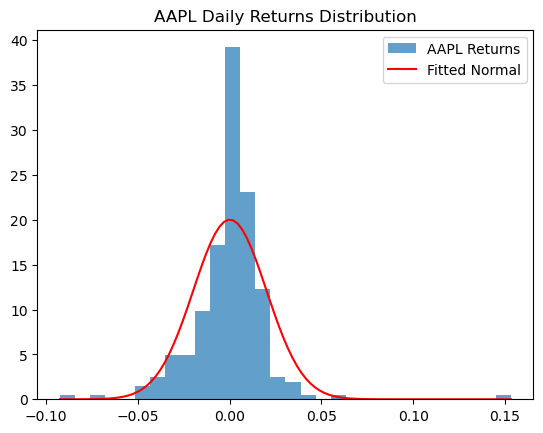

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Download AAPL data (1 year, daily)
aapl = yf.download('AAPL', start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)
# Calculate daily returns
aapl['Daily Return'] = aapl['Close'].pct_change().dropna()
# Stats
mean_return = aapl['Daily Return'].mean()
std_return = aapl['Daily Return'].std()
print(f"AAPL Mean Daily Return: {mean_return:.6f}, Std Dev: {std_return:.6f}")

# SciPy: Fit normal distribution to returns
returns = aapl['Daily Return'].dropna()
mu, sigma = stats.norm.fit(returns)
print(f"Fitted Normal - Mean: {mu:.6f}, Std Dev: {sigma:.6f}")

# Plot histogram with fitted curve
plt.hist(returns, bins=30, density=True, alpha=0.7, label="AAPL Returns")
x = np.linspace(min(returns), max(returns), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("AAPL Daily Returns Distribution")
plt.legend()
plt.show()

# Variance Notes
- Variance: Measures spread of data around mean.
- Formula: σ² = Σ(x_i - μ)² / N.
-  Used in quant finance to assess risk (e.g., stock volatility).

In [7]:
variance = aapl['Daily Return'].var()
print(f"AAPL Returns Variance: {variance:.6f}")

AAPL Returns Variance: 0.000399


In [9]:
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
    return []

# Test
nums = [2, 7, 11, 15]
target = 9
print(twoSum(nums, target)) # Should print [0, 1]

[0, 1]


# LeetCode: Two Sum
- Problem: Find indices of two numbers in array that sum to target.
- Solution: Use hash map for 0(n) time complexity.

# Day 3: Multi-Stock Portfolio Analysis
Analyzing AAPL, MSFT, GOOGL returns with pandas, yfinance, SciPy.


Portfolio mean Daily Return: 0.000496, Std Dev: 0.015473
Fitted Normal - Mean: 0.000496, Std Dev: 0.015442


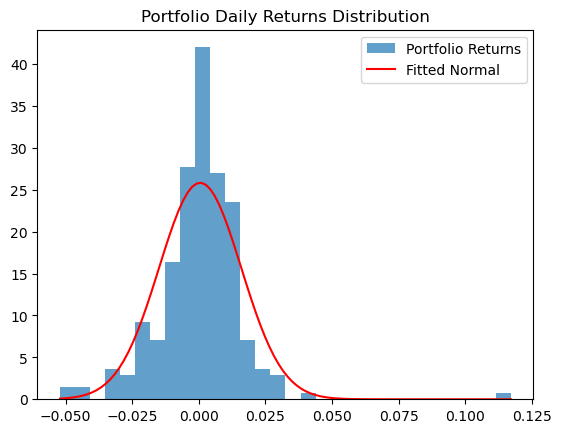

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
# Calculate daily returns
returns = data.pct_change().dropna()
# Equal-weighted portfolio (1/3 each)
weights = np.array([1/3, 1/3, 1/3])
portfolio_returns = returns.dot(weights)
# Stats
mean_portfolio = portfolio_returns.mean()
std_portfolio = portfolio_returns.std()
print(f"Portfolio mean Daily Return: {mean_portfolio:.6f}, Std Dev: {std_portfolio:.6f}")

# Scipy: Fit normal distribution to portfolio returns
mu, sigma = stats.norm.fit(portfolio_returns)
print(F"Fitted Normal - Mean: {mu:.6f}, Std Dev: {sigma:.6f}")

# Plot
plt.hist(portfolio_returns, bins=30, density=True, alpha=0.7, label="Portfolio Returns")
x = np.linspace(min(portfolio_returns), max(portfolio_returns), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("Portfolio Daily Returns Distribution")
plt.legend()
plt.show()


# Covariance Notes
- Covarinace: Measures joint variablity of two variables
-  Formula: Cov(X, Y) = Σ(x_i - μ_x)(y_i - μ_y) / N.
-  Quant use: Assesses stock return relationships for portfolio risk.

In [4]:
covariance = returns['AAPL'].cov(returns['MSFT'])
print(f"AAPL-MSFT Covariance: {covariance:.6f}")

AAPL-MSFT Covariance: 0.000182


In [5]:
def isValid(s):
    stack = []
    brackets = {')': '(', '}': '{', ']': '['}
    for char in s:
        if char in brackets.values():
            stack.append(char)
        elif char in brackets:
            if not stack or stack.pop() != brackets[char]:
                return False
    return len(stack) == 0

# Test
print(isValid("()[]{}")) # True
print(isValid("{]"))     # False

True
False


# Leetcode: Valid Parentheses
- Problem: Check if parantheses string is valid.
- Solution: Use stack to match opening/closing brackets.

# Day 4: Portfolio Optimization
Optimizing a portfolio of AAPL, MSFT, and GOOGL using SciPy's minimize function.
- objectives:
  - Calculate daily returns and covariance matrix for three stocks.
  - Optimize portfolio weighs to minimize variance (risk).
  - Compute annualized return and volatility.
  - Plot the efficient frontier with optimal portfolio.
  - Include risk-free rate for context (Sharpe ratio calculation).

Optimal Weights - AAPL: 0.1714, MSFT: 0.1959, GOOGL: 0.6327
Portfolio Annualised Return: 0.1592
Portfolio Annualised Volatility: 0.2368
Sharpe Ratio:  0.5454


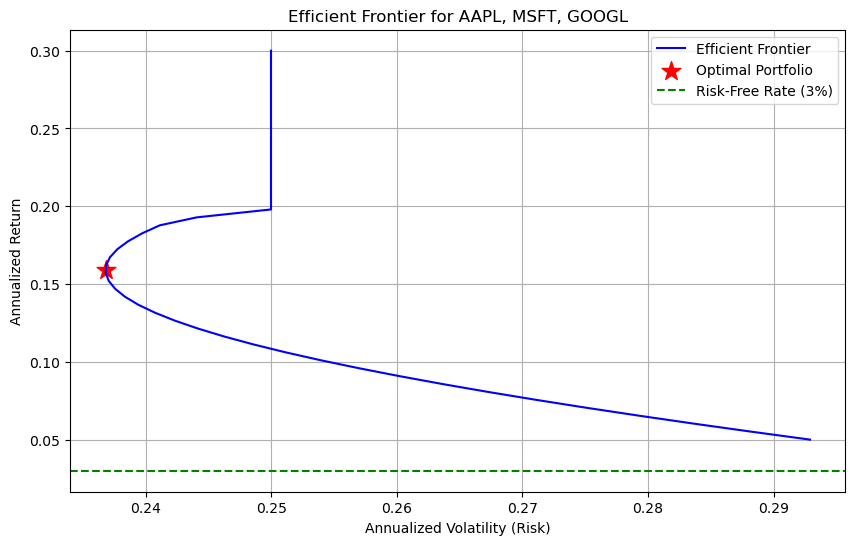

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_return(weights, returns, annualise=True):
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret # Annualised or daily
def portfolio_volatility(weights, returns, cov_matrix, annualise=True):
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * (252 if annualise else 1), weights)))
    return vol
def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.03):
    ret = portfolio_return(weights, returns)
    vol = portfolio_volatility(weights, returns, cov_matrix)
    return (ret -risk_free_rate) / vol # Annualised Sharpe ratio

# Covariance matrix
cov_matrix = returns.cov()

# Optimisation setup
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # Weights sum to 1
bounds = tuple((0, 1) for num in range(num_assets)) # Weights between 0 and 1
initial_weights = np.array([1/num_assets] * num_assets) # Equal weights


# Minimise volatility
opt_result = minimize(
    fun=lambda w: portfolio_volatility(w, returns, cov_matrix),
    x0=initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
opt_weights = opt_result.x
print(f"Optimal Weights - AAPL: {opt_weights[0]:.4f}, MSFT: {opt_weights[1]:.4f}, GOOGL: {opt_weights[2]:.4f}")
print(f"Portfolio Annualised Return: {portfolio_return(opt_weights, returns):.4f}")
print(f"Portfolio Annualised Volatility: {portfolio_volatility(opt_weights, returns, cov_matrix):.4f}")
print(f"Sharpe Ratio:  {sharpe_ratio(opt_weights, returns, cov_matrix):.4f}")

# Efficient frontier
target_returns = np.linspace(0.05, 0.3, 50) # Range of annualised returns
volatilities = []
for r in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: portfolio_return(x, returns) -r}
    )
    res = minimize(
        fun=lambda w: portfolio_volatility(w, returns, cov_matrix),
        x0=initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=cons
    )
    volatilities.append(res.fun)
plt.figure(figsize=(10, 6))
plt.plot(volatilities, target_returns, 'b-', label="Efficient Frontier")
plt.scatter(
    portfolio_volatility(opt_weights, returns, cov_matrix),
    portfolio_return(opt_weights, returns),
    c='r', marker='*', s=200, label="Optimal Portfolio"
)
plt.axhline(y=0.03, color='g', linestyle='--', label="Risk-Free Rate (3%)")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.title("Efficient Frontier for AAPL, MSFT, GOOGL")
plt.legend()
plt.grid(True)
plt.show()
        


# Correlation Notes
- Correlation: Measures linear relationship between variables, [-1, 1].
- Formula: p = Cov(X,Y) / (σ_X * σ_Y).
- Quant application: Low correlation between stocks enhances diversification.

Correlation Matrix:
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.503659  0.577343
GOOGL   0.503659  1.000000  0.563364
MSFT    0.577343  0.563364  1.000000
AAPL-MSFT Correlation: 0.5773


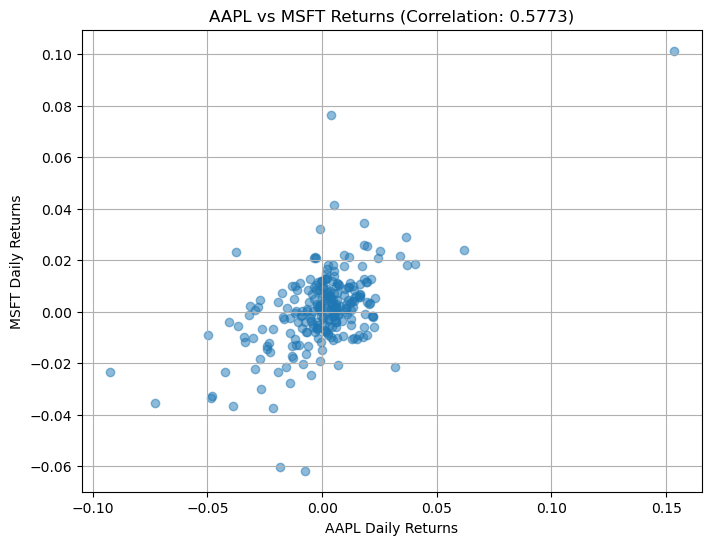

In [11]:
# Correlation matrix
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)
# AAPL-MSFT correlation
correlation_aapl_msft = returns['AAPL'].corr(returns['MSFT'])
print(f"AAPL-MSFT Correlation: {correlation_aapl_msft:.4f}")
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(returns['AAPL'], returns['MSFT'], alpha=0.5)
plt.xlabel("AAPL Daily Returns")
plt.ylabel("MSFT Daily Returns")
plt.title(f"AAPL vs MSFT Returns (Correlation: {correlation_aapl_msft:.4f})")
plt.grid(True)
plt.show()                                            
      

In [17]:
def reverse(x):
    if x == 0:
        return 0
    sign = 1 if x > 0 else -1
    x = abs(x)
    reversed_x = int(str(x)[::-1])
    if reversed_x > 2**31 -1:
        return 0
    return sign * reversed_x

# Test cases
print(reverse(123))       # 321
print(reverse(-123))      # -321
print(reverse(120))       # 21
print(reverse(1534235779)) # 0

321
-321
21
0


# LeetCode: Reverse Integer
- Problem: Reverse digits of an in